In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16


In [2]:
!tar -xf img1_1k.tar.gz

In [3]:
import os
train = os.listdir('img1_1k')[:200]

In [4]:
import cv2 
import numpy as np
from IPython.display import Image 
from IPython.display import display 

descriptors = list() 
for pic_path in train:
    
    img = cv2.imread('img1_1k/' + pic_path)
    if img is not None: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
      
        sift = cv2.xfeatures2d.SIFT_create() 
        kp, des = sift.detectAndCompute(gray, None) 
        if des is not None: 
            sorted_idx = sorted(range(len(kp)), key = lambda x: kp[x].response, reverse=True) 
            best_des = [des[i] for i in sorted_idx] 
            for d in best_des[:50]: 
                d = d / np.linalg.norm(d)
                d[np.argwhere(d > 0.2)] = 0.2
                d = d / np.linalg.norm(d)
                descriptors.append(d)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1000, random_state = 1337, max_iter = 300, n_init=10)
kmeans.fit(descriptors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1000, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=999, tol=0.0001, verbose=0)

In [6]:
full_data = os.listdir('img1_1k')
features = dict()
for pic_path in full_data:
    descriptors = list() 
    img = cv2.imread('img1_1k/' + pic_path) 
    if img is not None: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
   
        sift = cv2.xfeatures2d.SIFT_create() 
        kp, des = sift.detectAndCompute(gray, None) 
        if des is not None: 
            sorted_idx = sorted(range(len(kp)), key = lambda x: kp[x].response, reverse=True) 
            best_des = [des[i] for i in sorted_idx] 
            for d in best_des[:50]: 
                 d = d / np.linalg.norm(d)

                 d[np.argwhere(d > 0.2)] = 0.2
                 d = d / np.linalg.norm(d)
                 descriptors.append(d)
            cur_features = kmeans.predict(descriptors)   
            features[pic_path] = cur_features
        

In [7]:
test = ['img1_1k/310b7746743c6852.jpg',
'img1_1k/6bbbe92bfa19293f.jpg',
'img1_1k/24ea0ab30b27e724.jpg',
'img1_1k/3010e4d93a555dbe.jpg',
'img1_1k/6e33e6b39c44e7f4.jpg']

In [14]:
from multiset import Multiset

In [24]:
res = dict()
count = dict()
for cur_pic in features.items():
    res[cur_pic[0]] = 0
    maximum = 0
    count[cur_pic[0]] = 0
    for other_pic in features.items():
        if cur_pic[0] == other_pic[0]:
          continue
        cur_intersect = len(Multiset(cur_pic[1]).intersection(Multiset(other_pic[1])))
        if maximum < cur_intersect:
          maximum = cur_intersect
          res[cur_pic[0]] =  other_pic[0]
          count[cur_pic[0]] = 1
        elif maximum == cur_intersect:
          count[cur_pic[0]] += 1
 

Current img:


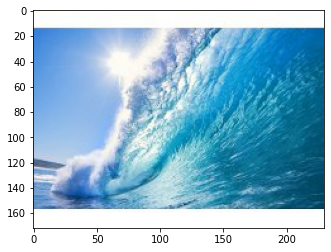

Duplicate for it:


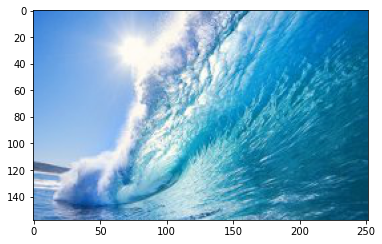

Number of duplicates:  2
Current img:


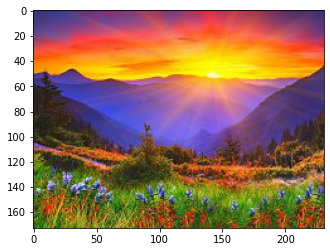

Duplicate for it:


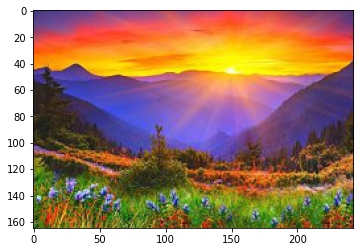

Number of duplicates:  2
Current img:


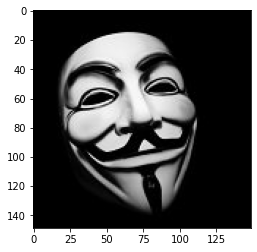

Duplicate for it:


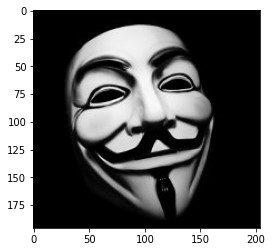

Number of duplicates:  2
Current img:


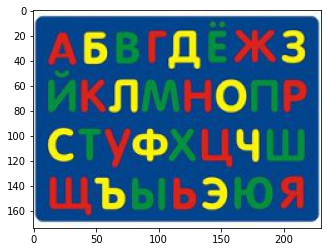

Duplicate for it:


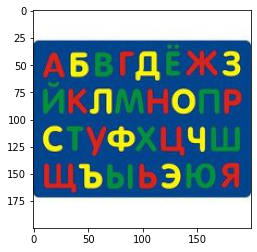

Number of duplicates:  2
Current img:


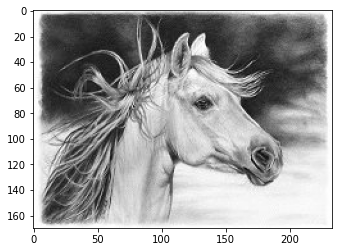

Duplicate for it:


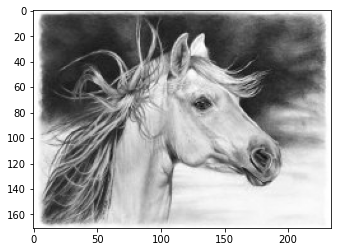

Number of duplicates:  2


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(len(test)):
  print('Current img:')
  img = mpimg.imread(test[i])
  imgplot = plt.imshow(img)
  plt.show()
  print('Duplicate for it:')
  img = mpimg.imread('img1_1k/' + res[test[i][len('img1_1k/'):]])
  imgplot = plt.imshow(img)
  plt.show()
  print('Number of duplicates: ', count[cur_pic[0]])